In [1]:
import numpy as np
# from struct_env.zayas_env import Zayas
from struct_env.zayas_env_plot import Zayas
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib notebook
from heuristics.heuristics_intervals import Heuristics

## Retrieving results

In [2]:
f_zero = np.load('collisions/results_dec5/heuristics_2022_11_27_174543.npz', allow_pickle=True)
f_low = np.load('collisions/results_dec5/f1_heuristics_2022_12_05_121517.npz', allow_pickle=True)
f_mid = np.load('collisions/results_dec5/f2_heuristics_2022_12_05_170527.npz', allow_pickle=True)
f_high = np.load('collisions/results_dec5/f3_heuristics_2022_12_05_191433.npz', allow_pickle=True)

frequencies = {}
frequencies['zero'] = [0, 0, 0, 0, 0]
frequencies['low'] = [1.e-2, 1.e-3, 5.e-4, 1.e-5, 1.e-6]
frequencies['mid'] = [1.e-1, 1.e-2, 5.e-3, 1.e-4, 1.e-5]
frequencies['high'] = [5.e-1, 5.e-2, 1.e-2, 5.e-4, 5.e-5]

heuristics = {}
heuristics['zero'] = f_zero['opt_heur'].tolist()
heuristics['low'] = f_low['opt_heur'].tolist()
heuristics['mid'] = f_mid['opt_heur'].tolist()
heuristics['high'] = f_high['opt_heur'].tolist()

## Plotting costs

In [3]:
def get_costs(freq_list, heuristics_list, eval_episodes):
    test_plot = Heuristics(22, freq_list, 0.95, False)
    return_cost, action_log, cost_log = test_plot.eval_plot(eval_episodes, heuristics_list['insp_interv'],
                                                            heuristics_list['insp_comp'], 0.001)
    cost_log = np.array(cost_log)
    cost_mean = cost_log.mean(axis=0)
    cost_std = cost_log.std(axis=0)
    return cost_mean, cost_std

In [8]:
eval_number = 5000

iterat = ['zero', 'low', 'mid', 'high']
costs_eval = np.zeros((len(iterat), 3))
std_eval = np.zeros((len(iterat), 3))

for j in range(len(iterat)):
    costs_eval[j], std_eval[j] = get_costs(frequencies[iterat[j]], heuristics[iterat[j]], eval_number)

In [12]:
np.savez('costs_results.npz', eval_number = eval_number, costs_eval = costs_eval, std_eval = std_eval)

In [5]:
costs_eval

array([[ -15.31556579,  -53.60956742, -137.5506136 ],
       [ -15.30839607,  -57.57826506, -146.75817363],
       [ -10.97073633,  -83.06765011, -212.11585104],
       [ -20.08246001, -270.26127915, -410.48348006]])

In [6]:
std_eval

array([[2.30926389e-14, 2.38005178e+01, 1.09026149e+01],
       [7.13377978e-02, 2.72527621e+01, 3.02578866e+01],
       [3.86952196e-01, 3.15724624e+01, 8.59242233e+01],
       [9.69148186e-01, 5.74093826e+01, 1.86475542e+02]])

In [10]:
costs_eval

array([[ -15.31556579,  -55.61566331, -137.06607006],
       [ -15.29134918,  -60.78218497, -144.45835316],
       [ -11.01372976,  -86.32009915, -228.40370747],
       [ -20.10458923, -269.18557769, -400.15373018]])

In [9]:
std_eval

array([[1.36246570e-12, 2.47023693e+01, 1.00197096e+01],
       [1.54259265e-01, 2.58819191e+01, 3.23517228e+01],
       [3.12706192e-01, 3.26551600e+01, 9.81850720e+01],
       [9.44009550e-01, 5.90104516e+01, 1.76382544e+02]])

## Ploting action statistics

In [60]:
action_log

{'episode0': {'year1': {'agent_0': 0,
   'agent_1': 0,
   'agent_2': 0,
   'agent_3': 0,
   'agent_4': 0,
   'agent_5': 0,
   'agent_6': 0,
   'agent_7': 0,
   'agent_8': 0,
   'agent_9': 0,
   'agent_10': 0,
   'agent_11': 0,
   'agent_12': 0},
  'year2': {'agent_0': 0,
   'agent_1': 0,
   'agent_2': 0,
   'agent_3': 0,
   'agent_4': 0,
   'agent_5': 0,
   'agent_6': 0,
   'agent_7': 0,
   'agent_8': 0,
   'agent_9': 0,
   'agent_10': 0,
   'agent_11': 0,
   'agent_12': 0},
  'year3': {'agent_0': 0,
   'agent_1': 0,
   'agent_2': 0,
   'agent_3': 0,
   'agent_4': 0,
   'agent_5': 0,
   'agent_6': 0,
   'agent_7': 0,
   'agent_8': 0,
   'agent_9': 0,
   'agent_10': 0,
   'agent_11': 0,
   'agent_12': 0},
  'year4': {'agent_0': 0,
   'agent_1': 0,
   'agent_2': 0,
   'agent_3': 0,
   'agent_4': 0,
   'agent_5': 0,
   'agent_6': 0,
   'agent_7': 0,
   'agent_8': 0,
   'agent_9': 0,
   'agent_10': 0,
   'agent_11': 0,
   'agent_12': 0},
  'year5': {'agent_0': 0,
   'agent_1': 0,
   'agent

In [32]:
action_log['episode0']['year1']

{'agent_0': 0,
 'agent_1': 0,
 'agent_2': 0,
 'agent_3': 0,
 'agent_4': 0,
 'agent_5': 0,
 'agent_6': 0,
 'agent_7': 0,
 'agent_8': 0,
 'agent_9': 0,
 'agent_10': 0,
 'agent_11': 0,
 'agent_12': 0}

In [90]:
ind = 0
act0 = 0
for episodes, val in action_log.items():
    for years, actions in val.items():
        for acts, acts_ in actions.items():
            if acts == 'agent_0':
                if acts_ == 0:
                    act0 += 1
                print(acts_)
                ind += 1

0
0
0
0
0
0
0
0
0
0
1
2
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
2
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0
1
0
0
0
0
0
0
0
0
0


## Modified class for plotting (to be corrected later on)

In [2]:
env_ = Zayas()

In [3]:
env_.costs_plot

array([0., 0., 0.])

In [6]:
action = {}
for i in range(13):
    action[env_.agent_list[i]] = 1
action

{'agent_0': 1,
 'agent_1': 1,
 'agent_2': 1,
 'agent_3': 1,
 'agent_4': 1,
 'agent_5': 1,
 'agent_6': 1,
 'agent_7': 1,
 'agent_8': 1,
 'agent_9': 1,
 'agent_10': 1,
 'agent_11': 1,
 'agent_12': 1}

In [7]:
_ = env_.reset()
rew_total_ = 0
done_ = 0
pf_fatigue = []
while not done_:
    [bel_, rew_, done_, _] = env_.step(action)
    # print(rew_)
    pf_fat = env_.beliefs[0, -1]
    print(env_.costs_plot)
    pf_fatigue.append(pf_fat)
    rew_total_ += rew_['agent_0']
rew_total_

[-2.60000000e+01  0.00000000e+00 -1.69182958e-03]
[-50.7         0.         -0.0581124]
[-74.165        0.          -0.22421848]
[-96.45675     0.         -0.3464569]
[-117.6339125     0.           -0.44047841]
[-137.75221687    0.           -1.13982778]
[-156.86460603    0.           -1.53061964]
[-175.02137573    0.           -2.5709747 ]
[-192.27030694    0.           -3.08950058]
[-208.6567916     0.           -3.35389263]
[-224.22395202    0.           -5.32028872]
[-239.01275442    0.           -6.55394032]
[-253.06211669    0.           -7.06256755]
[-266.40901086    0.           -8.25747771]
[-279.08856032    0.           -9.23944251]
[-291.1341323     0.           -9.57994028]
[-302.57742569    0.           -9.89322071]
[-313.4485544     0.          -10.24593893]
[-323.77612668    0.          -10.46243824]
[-333.58732035    0.          -11.36520899]
[-342.90795433    0.          -11.8439015 ]
[-351.76255661    0.          -14.03975255]
[-360.17442878    0.          -19.3106239

-473.8380987227734

# Initializing the environment

In [2]:
env_ = Zayas()

## Computing failure probabilities due to fatigue (do-nothing action)

In [3]:
action = {}
for i in range(13):
    action[env_.agent_list[i]] = 0
action

{'agent_0': 0,
 'agent_1': 0,
 'agent_2': 0,
 'agent_3': 0,
 'agent_4': 0,
 'agent_5': 0,
 'agent_6': 0,
 'agent_7': 0,
 'agent_8': 0,
 'agent_9': 0,
 'agent_10': 0,
 'agent_11': 0,
 'agent_12': 0}

In [4]:
_ = env_.reset()
rew_total_ = 0
done_ = 0
pf_fatigue = []
while not done_:
    [bel_, rew_, done_, _] = env_.step(action)
    # print(rew_)
    pf_fat = env_.beliefs[0, -1]
    print(pf_fat)
    pf_fatigue.append(pf_fat)
    rew_total_ += rew_['agent_0']
rew_total_

2e-07
5.899999999999999e-06
4.15e-05
0.00014199999999999998
0.00034869999999999996
0.0007072999999999999
0.0012228
0.0019351000000000001
0.0028618999999999997
0.003982899999999999
0.0053387999999999994
0.006916599999999999
0.0087143
0.0107164
0.0129131
0.015295
0.017865
0.0206046
0.023503700000000002
0.026553700000000003
0.0297565
0.0330791
0.0365621
0.0401212
0.0437738
0.0475335
0.0514035
0.0553243
0.0593539
0.063436


-304.1933924772498

In [5]:
pf_fatigue

[2e-07,
 5.899999999999999e-06,
 4.15e-05,
 0.00014199999999999998,
 0.00034869999999999996,
 0.0007072999999999999,
 0.0012228,
 0.0019351000000000001,
 0.0028618999999999997,
 0.003982899999999999,
 0.0053387999999999994,
 0.006916599999999999,
 0.0087143,
 0.0107164,
 0.0129131,
 0.015295,
 0.017865,
 0.0206046,
 0.023503700000000002,
 0.026553700000000003,
 0.0297565,
 0.0330791,
 0.0365621,
 0.0401212,
 0.0437738,
 0.0475335,
 0.0514035,
 0.0553243,
 0.0593539,
 0.063436]

## Option 2: based on robustness index

In [10]:
def pf_sys_energies(pf_fatigue, energy_intensity):
    pf_sys_ener = np.zeros(env_.n_elem)
    for i in range(env_.n_elem):
        energy = np.zeros(env_.n_elem)
        pf_brace = np.zeros(env_.n_elem)
        pf_fat = np.zeros(env_.n_comp)
        if env_.indZayas[i,1] > 0:
            pf_fat[env_.indZayas[i,0]] = pf_fatigue
            pf_fat[env_.indZayas[i,0] + 1] = pf_fatigue
        else:
            pf_fat[env_.indZayas[i,0]] = pf_fatigue  
        if env_.energy_max_index[i] < 2:
            energy[i] = energy_intensity
            pf_brace = env_.pf_col(energy)
        pf_sys_ener[i] = env_.pf_sys(pf_fat, pf_brace)
    pf_sys_ref = env_.pf_sys(np.zeros(env_.n_comp), np.zeros(env_.n_elem))
    reliab_ref = -norm.ppf(pf_sys_ref)
    reliab_sys_ener = -norm.ppf(pf_sys_ener)
    robust_index = (reliab_ref) / (reliab_ref - reliab_sys_ener)
    return robust_index

In [11]:
pf_fat_loop = [0, pf_fatigue[10], pf_fatigue[29]]

rel_fat_ = np.zeros((3, 5, 13))
for j in range(3):    
    ind = 0
    for energy_ in env_.col_intens:
        rel_fat_[j, ind, :] = pf_sys_energies(pf_fat_loop[j], energy_)
        ind += 1
rel_fat_

C:\Users\user\Anaconda3\envs\gym\lib\site-packages\ipykernel_launcher.py:19: RuntimeWarning: divide by zero encountered in true_divide


array([[[7.95558813e+01, 8.49098646e+00, 1.90079899e+02, 1.93803131e+02,
                    inf,            inf,            inf,            inf,
         3.43500705e+03, 1.42345869e+04, 2.72815112e+04, 6.05871496e+02,
                    inf],
        [2.07039805e+01, 3.90752422e+00, 4.48555123e+01, 4.56648028e+01,
                    inf,            inf,            inf,            inf,
         1.89883942e+02, 7.72130005e+02, 5.90690912e+03, 1.34961783e+02,
                    inf],
        [1.55537741e+01, 3.36578901e+00, 3.23762188e+01, 3.29375150e+01,
                    inf,            inf,            inf,            inf,
         9.04577259e+01, 3.59878168e+02, 4.08046601e+03, 9.46963207e+01,
                    inf],
        [1.38328230e+01, 3.16676661e+00, 2.82492791e+01, 2.87290771e+01,
                    inf,            inf,            inf,            inf,
         6.52129661e+01, 2.55313911e+02, 3.47882561e+03, 8.14258567e+01,
                    inf],
        [1.29311353e

In [12]:
rob_index = np.delete(rel_fat_, [4,5,6,7,12], axis = 2)

<IPython.core.display.Javascript object>


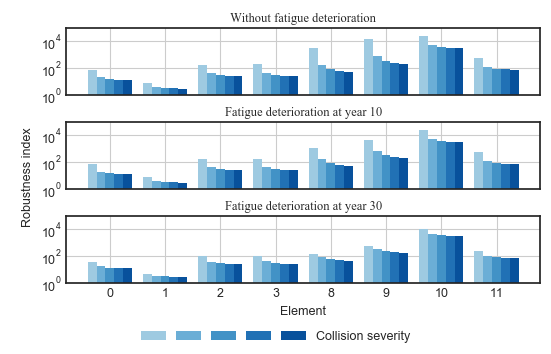

In [20]:
cm = 1/2.54  # centimeters in inches
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 9
plt.style.use('seaborn-white')

barWidth = 0.16
xpos = np.arange(8)
color_ = ['#9ecae1', '#6baed6', '#4292c6', '#2171b5', '#08519c']
cases_ = ['Without fatigue deterioration', 'Fatigue deterioration at year 10', 'Fatigue deterioration at year 30']
ylims = [1e5, 1e5, 1e5]
fig, ax = plt.subplots( 3 , figsize=(14*cm, 9*cm), sharex=True)

for j in range(3):
    for i in range(5):
        xpos_ = [x + barWidth*i for x in xpos]
        ax[j].bar(xpos_, rob_index[j, i, :], width = barWidth, color = color_[i], label ='IT')
    ax[j].set_title(cases_[j], pad = 4, fontsize = 9, fontfamily = "Times New Roman")
    ax[j].set_yscale('log')
    ax[j].set_ylim(1, ylims[j])
    ax[j].grid()
    ax[j].set_xticks([r + 2*barWidth for r in range(8)])
    ax[j].set_xticklabels([str(i) for i in [0,1,2,3,8,9,10,11]])
    ax[j].set_yticks([1, 1e2, 1e4])

fig.legend(['','','','','Collision severity'], loc=8, ncol=5, columnspacing = 0.01)

fig.text(0.04, 0.5, 'Robustness index', va='center', rotation='vertical')
plt.xlabel('Element')
plt.subplots_adjust(bottom=0.2, top=0.92, left=0.12, right=0.98, hspace = 0.4)
plt.savefig('robustness_plot.pdf')